# Decision Tree for Predictive Modeling

1. Data Exploration:
a. Load the dataset using Python libraries like pandas and explore its structure. Describe the features, 
target variables, and data distribution.
b. Discuss the importance of customer satisfaction and sales prediction in the retail business context

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('retail_data.csv')
data.head()


,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,NaN,Credit Card
1,4115,Tunic,2456.0,2023-07-11,2.0,Credit Card
2,4019,Tank Top,2102.0,2023-03-23,4.1,Cash
3,4097,Leggings,3126.0,2023-03-15,3.2,Cash
4,3997,Wallet,3003.0,2022-11-27,4.7,Cash


In [2]:
data.isna().sum()

Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

In [3]:
data=data.fillna(method='bfill')
data.isna().sum()

Customer Reference ID    0
Item Purchased           0
Purchase Amount (USD)    0
Date Purchase            0
Review Rating            0
Payment Method           0
dtype: int64

In [4]:
data.head(1)

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,Handbag,4619.0,2023-02-05,2.0,Credit Card


In [5]:
#changing the values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['Item Purchased']=le.fit_transform(data['Item Purchased'])
data['Purchase Amount (USD)']=le.fit_transform(data['Purchase Amount (USD)'])
data['Date Purchase']=le.fit_transform(data['Date Purchase'])
data['Payment Method']=le.fit_transform(data['Payment Method'])
data.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating,Payment Method
0,4018,13,228,126,2.0,1
1,4115,46,201,282,2.0,1
2,4019,42,192,172,4.1,0
3,4097,20,212,164,3.2,0
4,3997,49,211,56,4.7,0


# 2. Classification Task - Predicting Payment Method:
a. Implement a decision tree classifier using Python libraries like scikit-learn to predict customer 
satisfaction.
b. Split the dataset into training and testing sets and train the model.
c. Evaluate the classification model's performance using relevant metrics such as accuracy, precision, 
recall, and F1-score.


In [6]:
#assign x and y
x=data.iloc[:,:-1]
x.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD),Date Purchase,Review Rating
0,4018,13,228,126,2.0
1,4115,46,201,282,2.0
2,4019,42,192,172,4.1
3,4097,20,212,164,3.2
4,3997,49,211,56,4.7


In [7]:
y=data.iloc[:,-1:]
y.head()

,Payment Method
0,1
1,1
2,0
3,0
4,0


In [8]:

from sklearn.model_selection import train_test_split
#split the data for trainig and testing
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)
print('Training data -X - shape:\t',xtrain.shape)
print()
print('Training data -Y - shape:\t',ytrain.shape)
print()
print('Testing data shape\n')
print('testing data(x-input) shape :\t',xtest.shape)
print()
print('testing data(Y-input) shape :\t',ytest.shape)

Training data -X - shape:	 (2720, 5)

Training data -Y - shape:	 (2720, 1)

Testing data shape

testing data(x-input) shape :	 (680, 5)

testing data(Y-input) shape :	 (680, 1)


In [13]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='entropy')
print('*'*100)
print('Decison Tree Model')
print('*'*100)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_clf.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred=dt_clf.predict(xtest)
print('Predicted class labels for the test samples:\n',ypred)
print()
print('Testing completed')
print('='*100)

#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('*'*100)
print('Decison Tree - Performance Measures')
print('*'*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
print('='*100)
print('Confusion Matric:\n',confusion_matrix(ytest,ypred))
print('='*100)
print('Classification Report\n',classification_report(ytest,ypred))
print('='*100)

precision = precision_score(ytest, ypred, average='weighted')
recall = recall_score(ytest, ypred, average='weighted')
f1 = f1_score(ytest, ypred, average='weighted')

# Print the metrics

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

****************************************************************************************************
Decison Tree Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [150 309 327 360  27 253 304 108 127 150  97  48  75 340  64 301 357 300
 279 273 240 238 353 143 363 310 362  67 291  65 176 116 349 210 317 147
 298 315 336 300  93  39 357 278 250 334 324 104 339 232 162 193 199 144
 278 324  52 196  94 218 157 309 232 152  36  50 293 294 277 250 118  29
 348 276  78 326 225  67 116 264 137 183 186 209 183 363 190 254 104 230
 216 205 149  92  49

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_cla

# 3. Regression Task - Predicting Sales:
a. Implement a decision tree regression model using Python libraries to predict sales based on customer 
attributes and behavior.
b. Discuss the differences between classification and regression tasks in predictive modeling.
c. Split the dataset into training and testing sets and train the regression model.
d. Evaluate the regression model's performance using metrics such as mean squared error (MSE) and R-squared.

In [10]:
X=data.iloc[:,:-3]
X.head()

,Customer Reference ID,Item Purchased,Purchase Amount (USD)
0,4018,13,228
1,4115,46,201
2,4019,42,192
3,4097,20,212
4,3997,49,211


In [11]:
Y=data.iloc[:,-3:-2]
Y.head()

,Date Purchase
0,126
1,282
2,172
3,164
4,56


In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=.25,random_state=2)
print('****************Training Data Shape********************\n')
print('Training data-X- Shape:\t',xtrain.shape)
print()
print('Training data-y- Shape:\t',ytrain.shape)
print()
print('****************Testing Data Shape********************\n')
print('Testing data(x-Input) Shape:\t',xtest.shape)
print()
print('Testing data(y-Outcome) Shape:\t',ytest.shape)


****************Training Data Shape********************

Training data-X- Shape:	 (2550, 3)

Training data-y- Shape:	 (2550, 1)

****************Testing Data Shape********************

Testing data(x-Input) Shape:	 (850, 3)

Testing data(y-Outcome) Shape:	 (850, 1)


In [14]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='entropy',max_depth=2)
print('*'*100)
print('Decison Tree Model')
print('*'*100)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print('Hyperparameter:\n',dt_clf.get_params())
print('Training Completed')
print('='*100)
print('\n Test Phase')
ypred=dt_clf.predict(xtest)
print('Predicted class labels for the test samples:\n',ypred)
print()
print('Testing completed')
print('='*100)


#import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
print('*'*100)
print('Decison Tree - Performance Measures')
print('*'*100)
print('Accuracy Score:\t',accuracy_score(ytest,ypred))
precision = precision_score(ytest, ypred, average='weighted')
recall = recall_score(ytest, ypred, average='weighted')
f1 = f1_score(ytest, ypred, average='weighted')

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

****************************************************************************************************
Decison Tree Model
****************************************************************************************************

 Training Phase
Hyperparameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Training Completed

 Test Phase
Predicted class labels for the test samples:
 [153 153 153 160 153 153 153 230 153 160  65 153 153  65 153 153 160 230
 230  65 153 230 230 153 153 153 160 230 230 160 230 230 153 153 230 153
 160 230 153 153 230 153 153 153 153 160 153 160 153 153 153 153  65 153
  65 153  65  65 153 153 153 153 160 153 230  65 160 230 153 153 153 153
 153 153 153 230 153 153 153 153 153 153  65 230 153  65 153 230  65 230
 153 153  65 230 153 15

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Create and train the decision tree regressor
regressor = DecisionTreeRegressor()
regressor.fit(xtrain, ytrain)

# Make predictions on the test set
ypred = regressor.predict(xtest)

# Calculate evaluation metrics
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

# Print the metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 21005.133235294117
R-squared: -0.9384036370963678


# 4. Decision Tree Visualization:
a. Visualize the decision tree for both the classification and regression models. Discuss the interpretability 
of decision trees in predictive modeling.


[Text(0.5, 0.8333333333333334, 'x[2] <= 55.5\nentropy = 8.412\nsamples = 2550\nvalue = [6, 10, 8, 12, 7, 12, 11, 4, 9, 8, 5, 9, 4, 8\n4, 10, 9, 8, 3, 4, 10, 8, 8, 10, 4, 10, 8, 5\n4, 10, 7, 5, 8, 7, 8, 5, 7, 7, 8, 10, 6, 4\n3, 3, 6, 4, 9, 6, 8, 3, 6, 8, 6, 6, 5, 1\n6, 4, 7, 2, 9, 11, 4, 3, 5, 9, 4, 15, 11, 7\n7, 7, 7, 9, 2, 11, 5, 7, 8, 6, 9, 9, 7, 10\n11, 7, 9, 8, 10, 8, 5, 6, 8, 12, 7, 8, 5, 5\n6, 5, 5, 6, 8, 6, 8, 8, 8, 8, 8, 4, 6, 9\n6, 8, 5, 7, 11, 3, 9, 6, 10, 6, 3, 6, 5, 10\n9, 6, 7, 2, 9, 7, 10, 5, 9, 3, 9, 12, 7, 6\n4, 7, 7, 10, 8, 6, 4, 6, 5, 7, 8, 8, 11, 12\n5, 6, 3, 9, 3, 5, 7, 7, 7, 5, 14, 8, 5, 9\n8, 7, 6, 6, 9, 6, 4, 5, 6, 5, 5, 4, 6, 8\n4, 8, 2, 7, 7, 1, 4, 9, 9, 5, 13, 5, 4, 9\n13, 4, 11, 5, 8, 7, 7, 5, 14, 11, 7, 13, 5\n4, 11, 6, 6, 6, 8, 10, 10, 7, 5, 9, 8, 5, 8\n8, 4, 7, 6, 11, 5, 11, 10, 8, 7, 3, 5, 12, 4\n6, 4, 10, 5, 7, 10, 4, 7, 4, 9, 7, 8, 5, 5\n5, 8, 5, 8, 4, 8, 5, 7, 7, 7, 7, 8, 5, 7\n3, 4, 9, 8, 6, 5, 9, 4, 10, 5, 9, 11, 9, 6\n12, 8, 6, 5, 7, 5, 6, 5, 8, 8, 

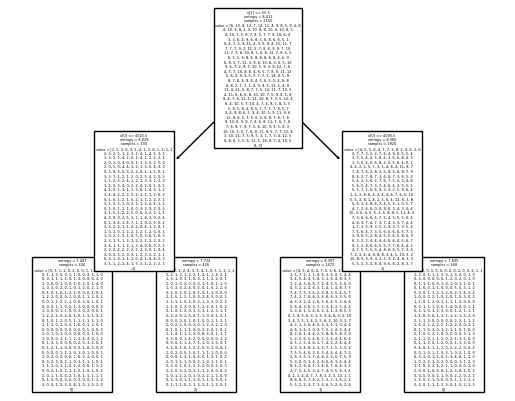

In [16]:
from sklearn import tree
tree.plot_tree(dt_clf)

5. Feature Importance:
a. Determine the most important features in both models by examining the decision tree structure. 
Discuss how feature importance is calculated in decision trees

6. Overfitting and Pruning:
a. Explain the concept of overfitting in the context of decision trees.
b. Discuss methods for reducing overfitting, such as pruning, minimum samples per leaf, and maximum 
depth.
c. Implement pruning or other techniques as necessary and analyze their impact on the model's 
performance.


7. Real-World Application:
a. Describe the practical applications of customer satisfaction prediction and sales forecasting in the retail 
industry.
b. Discuss the potential benefits of using predictive models in retail business operations and decisionmaking.